## 2024 Economic Analysis with Python using Fred API ##

![2024 Economy Logo](https://www.promarket.org/wp-content/uploads/2024/01/Econ_Trends.jpg)




In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv

# Set plotting style and pandas display options
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


from fredapi import Fred

# Retrieve your API key from environment variables
load_dotenv()
fred_key = os.getenv("API_KEY")


## 1. Obtain Fred Economic Data ##

In [3]:
fred = Fred(api_key=fred_key)

## 2. Search Economic Data ##

In [4]:
sp_search = fred.search('S&P', order_by='popularity')

In [5]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-04-29,2024-04-29,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-29 08:43:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-04-29,2024-04-29,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-03-26 08:11:02-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-04-29,2024-04-29,S&P 500,2014-04-28,2024-04-26,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-04-26 19:10:58-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-04-29,2024-04-29,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-04-29,2024-04-29,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-04-26,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-04-29 08:43:11-05:00,82,This data represents the effective yield of th...


## 3. Pull Raw Data ##

<Axes: title={'center': 'S&P 500'}>

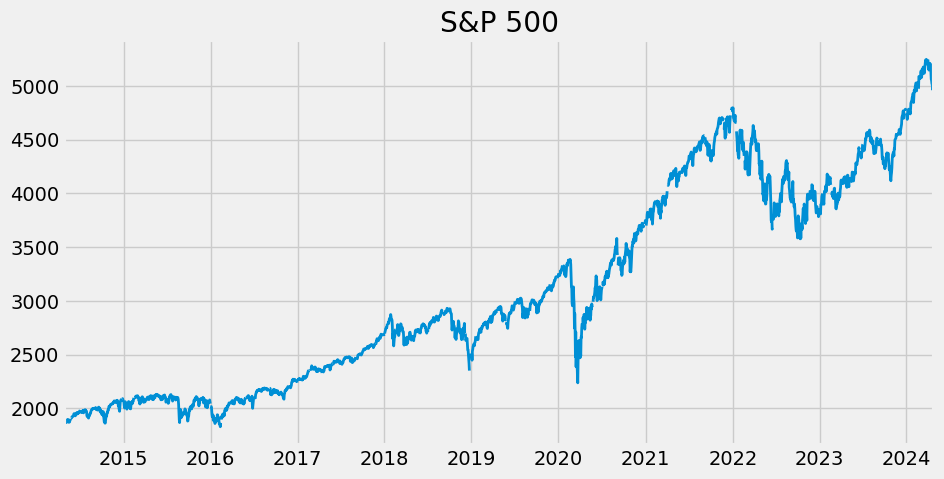

In [6]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

## 4. Merge Multiple Data Series

In [10]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
umemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-04-29,2024-04-29,Unemployment Rate,1948-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-04-29,2024-04-29,Unemployment Rate - Black or African American,1972-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:16-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2024-04-29,2024-04-29,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:50:20-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2024-04-29,2024-04-29,Unemployment Rate in California,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:02-05:00,64,None
TXUR,TXUR,2024-04-29,2024-04-29,Unemployment Rate in Texas,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-22 10:41:03-05:00,56,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000150,LNS14000150,2024-04-29,2024-04-29,Unemployment Rate - Married Men,1955-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-05 07:51:29-05:00,5,The series comes from the 'Current Population ...
NEIPTERM156SFRBRIC,NEIPTERM156SFRBRIC,2024-04-29,2024-04-29,Hornstein-Kudlyak-Lange Non-Employment Index i...,1994-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-12 14:03:03-05:00,5,The Hornstein-Kudlyak-Lange Non-Employment Ind...
LBSSA10,LBSSA10,2024-04-29,2024-04-29,Labor Force Participation Rate for Delaware,1976-01-01,2024-03-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-04-19 09:01:15-05:00,1,A state's labor-force participation rate is th...


In [9]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1)

KeyboardInterrupt: 

In [ ]:
unemp_states = unemp_results.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()

In [ ]:
px.line(unemp_states)